## Introduction to Artificial Neural Networks

>Birds inspired us to fly, burdock plants inspired velcro, and countless more inven‐
tions were inspired by nature. It seems only logical, then, to look at the brain’s archi‐
tecture for inspiration on how to build an intelligent machine. This is the key idea
that sparked artificial neural networks (ANNs).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

### From Biological to Artificial Neurons

ANNs have been around for quite a while. But everytime it enetred an era of long winter. We are now witnessing yet another wave of interest in ANNs. However, there a few good reasons to believe that
this wave is different and that it will have a much more profound impact on our lives. Such as:
* Large amounts of data
* Increase in computational power
* New training algorithms
* Some theoretical limitations of ANNs have turned out to be benign in practice.
For example, many people thought that ANN training algorithms were doomed
because they were likely to get stuck in local optima, but it turns out that this is
rather rare in practice (or when it is the case, they are usually fairly close to the
global optimum).

#### Biological Neurons and Logical Computation with Neurons

<figure>
<figcaption><h4>Biological neuron</h4></figcaption>
<img src = "img/10_01.png">
</figure>

Warren McCulloch and Walter Pitts proposed a very simple model of the biological
neuron, which later became known as an artificial neuron: it has one or more binary
(on/off) inputs and one binary output. The artificial neuron simply activates its out‐
put when more than a certain number of its inputs are active. McCulloch and Pitts
showed that even with such a simplified model it is possible to build a network of
artificial neurons that computes any logical proposition you want. 

<figure>
<figcaption><h4>ANNs performing simple logical computations</h4></figcaption>
<img src = "img/10_02.png">
</figure>

The working of first three networks is obvoius. The fourth network, on the other hand, computes a
slightly more complex logical proposition: neuron C is activated only if neuron A
is active and if neuron B is off. If neuron A is active all the time, then you get a
logical NOT: neuron C is active when neuron B is off, and vice versa.

#### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank
Rosenblatt. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs
and output are now numbers (instead of binary on/off values) and each input con‐
nection is associated with a weight. The TLU computes a weighted sum of its inputs
($z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = \mathbf{x}^T\mathbf{w}$), then applies a step function to that sum and
outputs the result: $h_w(\mathbf{x}) = step(z)$, where $\mathbf{x}^T\mathbf{w}$.

<figure>
<figcaption><h4>Threshold logic unit</h4></figcaption>
<img src = "img/10_03.png">
</figure>

The most common step function used in Perceptrons is the Heaviside step function or sign function. It is defined as:
$$h_w(z) = \begin{cases}
0 & \text{if } z < 0 \\
1 & \text{if } z \geq 0
\end{cases}$$
And
$$sgn(z) = \begin{cases}
-1 & \text{if } z < 0 \\
0 & \text{if } z = 0 \\
1 & \text{if } z \geq 0
\end{cases}$$

A single TLU can be used for simple linear binary classification. It computes a linear
combination of the inputs and if the result exceeds a threshold, it outputs the positive
class or else outputs the negative class.

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected
to all the inputs. When all the neurons in a layer are connected to every neuron in the
previous layer (i.e., its input neurons), it is called a fully connected layer or a dense
layer.

<figure>
<figcaption><h4>Perceptron diagram</h4></figcaption>
<img src = "img/10_04.png">
</figure>

The outputs of a fully connected layer simply is:
$$ h_{\mathbf{W, b}}(\mathbf{X}) = \phi(\mathbf{XW+b}) $$
With symols having the usual meaning. The $\phi$ is called the *activation function*, when the artificial neurons are
TLUs, it is a step function.

The way the Perceptron learns is:<br>
The Perceptron is fed one
training instance at a time, and for each instance it makes its predictions. For every
output neuron that produced a wrong prediction, it reinforces the connection
weights from the inputs that would have contributed to the correct prediction. 


<figure>
<figcaption><h4>Perceptron learning rule</h4></figcaption>
<img src = "img/10_05.png">
</figure>

>The decision boundary of each output neuron is linear, so Perceptrons are incapable
of learning complex patterns 

Scikit-Learn provides a `Perceptron` class that implements a single TLU network.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [8]:
per_clf.score(X, y)

1.0

Interesting! ):

>Scikit-Learn’s `Perceptron` class is equivalent
to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron"`,
`learning_rate="constant"`, `eta0=1` (the learning rate), and `penalty=None` (no regu‐
larization).

A perceptron has a some serious limitations. For example, they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem. However, it turns out that some of the limitations of Perceptrons can be eliminated by
stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron
(MLP). In particular, an MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented:

<figure>
<figcaption><h4>XOR classification problem and an MLP that solves it</h4></figcaption>
<img src = "img/10_06.png">
</figure>

#### Multi-Layer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs,
called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers,
and the ones close to the outputs are usually called the upper layers. Every layer
except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN contains a deep stack of hidden layers8, it is called a deep neural net‐
work (DNN). 

<figure>
<figcaption><h4>Multi-Layer Perceptron</h4></figcaption>
<img src = "img/10_07.png">
</figure>

The algorithm by which an MLP is trained is backpropogation. The steps are:
* It handles one mini-batch at a time (for example containing 32 instances each),
and it goes through the full training set multiple times. Each pass is called an
epoch.
*  Each mini-batch is passed to the network’s input layer, which just sends it to the
first hidden layer. The algorithm then computes the output of all the neurons in
this layer (for every instance in the mini-batch). The result is passed on to the
next layer, its output is computed and passed to the next layer, and so on until we
get the output of the last layer, the output layer. This is the forward pass: it is
exactly like making predictions, except all intermediate results are preserved
since they are needed for the backward pass.
* Next, the algorithm measures the network’s output error.
* Then it computes how much each output connection contributed to the error.
* The algorithm then measures how much of these error contributions came from
each connection in the layer below, until
the algorithm reaches the input layer. This reverse pass
efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network.
* Finally, the algorithm performs a Gradient Descent step to tweak all the connec‐
tion weights in the network, using the error gradients it just computed.

> To summarize: for each training
instance the backpropagation algorithm first makes a prediction (forward pass),
measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

> It is important to initialize all the hidden layers’ connection weights
randomly, or else training will fail. For example, if you initialize all
weights and biases to zero, then all neurons in a given layer will be
perfectly identical, and thus backpropagation will affect them in
exactly the same way, so they will remain identical. In other words,
despite having hundreds of neurons per layer, your model will act
as if it had only one neuron per layer: it won’t be too smart. If
instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

In order for this algorithm to work properly, the authors made a key change to the
MLP’s architecture: they replaced the step function with the logistic function, $σ(z) =
1 / (1 + exp(–z))$. This was essential because the step function contains only flat seg‐
ments, so there is no gradient to work with (Gradient Descent cannot move on a flat
surface), while the logistic function has a well-defined nonzero derivative every‐
where, allowing Gradient Descent to make some progress at every step. In fact, the
backpropagation algorithm works well with many other activation functions, not just
the logistic function. Two of these are:
* The hyperbolic tangent function $tanh(z) = 2σ(2z) – 1$
* The Rectified Linear Unit function: $ReLU(z) = max(0, z)$

<figure>
<figcaption><h4>Activation functions and their derivatives</h4></figcaption>
<img src = "img/10_08.png">
</figure>

#### Regression MLPs

MLPs can be used for regression tasks. (No surprise!). For multivariate regression (i.e., to predict
multiple values at once), you need one output neuron per output dimension. For
example, to locate the center of an object on an image, you need to predict 2D coordi‐
nates, so you need two output neurons. If you also want to place a bounding box
around the object, then you need two more numbers: the width and the height of the
object. So you end up with 4 output neurons.

>In general, when building an MLP for regression, you do not want to use any activa‐
tion function for the output neurons, so they are free to output any range of values.
However, if you want to guarantee that the output will always be positive, then you
can use the ReLU activation function, or the softplus activation function in the output
layer. Finally, if you want to guarantee that the predictions will fall within a given
range of values, then you can use the logistic function or the hyperbolic tangent, and
scale the labels to the appropriate range: 0 to 1 for the logistic function, or –1 to 1 for
the hyperbolic tangent.

>The Huber loss is quadratic when the error is smaller than a threshold δ (typically 1), but linear when the error is larger than δ. This
makes it less sensitive to outliers than the mean squared error, and
it is often more precise and converges faster than the mean absolute error.

<figure>
<figcaption><h4>Typical Regression MLP Architecture</h4></figcaption>
<img src = "img/10_09.png">
</figure>

#### Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem,
you just need a single output neuron using the logistic activation function: the output
will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. Morever, MLPs can be used to predict multiple classes too. In this case, you would need two output neurons, both using the logistic activation function.<br>
If each instance can belong only to a single class, out of 3 or more possible classes
(e.g., classes 0 through 9 for digit image classification), then you need to have one
output neuron per class, and you should use the softmax activation function for the
whole output layer

<figure>
<figcaption><h4>Typical Classification MLP Architecture</h4></figcaption>
<img src = "img/10_10.png">
</figure>

A great link **https://playground.tensorflow.org/**

### Implementing MLPs with Keras

Keras was developed by François Chollet as part of a
research project and released as an open source project in March 2015. To perform the heavy computations required by neural networks, keras-team relies on a
computation backend. At the present, you can choose from three popular open
source deep learning libraries: TensorFlow, Microsoft Cognitive Toolkit (CNTK) or
Theano.

#### Building an Image Classifier Using the Sequential API

We'll use MNIST's *Fashion* dataset for building a classifier.

In [101]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [102]:
X_train_full.shape

(60000, 28, 28)

In [103]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Since MNIST provides label for each class, we need a way to infer what value does the label corressponds to.

In [104]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

Let's first see how well the linear classifier performs on this dataset.

In [105]:
X_train_lin = X_train_full.reshape((60000,784))/255.0
X_test_lin = X_test.reshape((10000,784))/255.0

In [106]:
X_train_lin.min()

0.0

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_lin, y_train_full)

LogisticRegression(max_iter=10000)

In [38]:
lr.score(X_test_lin, y_test)

0.8443

So, a simple linear model gives 84% of accuracy. We can, of course, improve this but let's stick with this for now! Now, let's build a classifier using the Sequential API.

The MLP can be implemented using two ways:

In [107]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Or

In [97]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

How is it done?<br>
* The first line creates a Sequential model. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers, con‐
nected sequentially. This is called the sequential API.
* Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is simply to convert each input image into a 1D array: if it receives input data
X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is
just there to do some simple preprocessing. Since it is the first layer in the model,
you should specify the input_shape: this does not include the batch size, only the
shape of the instances. Alternatively, you could add a `keras.layers.InputLayer`
as the first layer, setting `shape=[28,28]`.
* Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the
connection weights between the neurons and their inputs. It also manages a vector of bias terms, one per neuron.
* Next we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive)

The model’s `summary()` method displays all the model’s layers, including each layer’s
name (which is automatically generated unless you set it when creating the layer), its
output shape (None means the batch size can be anything), and its number of parame‐
ters. The summary ends with the total number of parameters, including trainable and
non-trainable parameters. You can also generate an image of your model using `keras.utils.plot_model()`. Furthermore, ll the parameters of a layer can be accessed using its `get_weights()` and
`set_weights() `method. For a Dense layer, this includes both the connection weights
and the bias terms

In [98]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.layers

In [47]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [53]:
weights

array([[-0.06480089, -0.07192267,  0.06306447, ...,  0.00244816,
         0.07386684, -0.06686679],
       [ 0.05389889,  0.06494448,  0.00671749, ...,  0.05636494,
        -0.06254327,  0.06099726],
       [ 0.02433742, -0.05609208,  0.02134802, ...,  0.03174756,
         0.0121516 , -0.04439304],
       ...,
       [-0.07298393,  0.02424685, -0.0043864 , ..., -0.02537306,
        -0.02095705, -0.01141737],
       [ 0.02961305,  0.07109299,  0.05594206, ...,  0.00472962,
         0.05424826,  0.03382988],
       [ 0.01390176, -0.04097348, -0.06613321, ..., -0.05188762,
         0.01220762,  0.03269567]], dtype=float32)

In [54]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Notice that the Dense layer initialized the connection weights randomly (which is
needed to break symmetry), and the biases were just initialized to zeros, which is fine. If you ever want to use a different initialization method,
you can set `kernel_initializer` (kernel is another name for the matrix of connection weights) or `bias_initializer` when creating the layer. 

In [51]:
weights.shape, biases.shape

((784, 300), (300,))

>The shape of the weight matrix depends on the number of inputs.
This is why it is recommended to specify the input_shape when
creating the first layer in a Sequential model. However, if you do
not specify the input shape, it’s okay: Keras will simply wait until it
knows the input shape before it actually builds the model. This will
happen either when you feed it actual data (e.g., during training),
or when you call its `build()` method. Until the model is really
built, the layers will not have any weights, and you will not be able
to do certain things (such as print the model summary or save the
model), so **if you know the input shape when creating the model, it
is best to specify it**.

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use.

In [108]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

Using `loss="sparse_categorical_crossentropy"` is equivalent to
`loss=keras.losses.sparse_categorical_crossentropy`. Similarly, `optimizer="sgd"` is equivalent to `optimizer=keras.optimizers.SGD()` and `metrics=["accuracy"]` is equivalent to
`metrics=[keras.metrics.sparse_categorical_accuracy]`.

Here, we use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the `categorical_crossentropy` loss instead.

Now the model is ready to be trained. For this we simply need to call its `fit()`
method. We pass it the input features `(X_train)` and the target classes `(y_train)`, as
well as the number of epochs to train. Default value of numbers of epoch is 1.

Let's train the model.

In [109]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 4ms/step - loss: 0.7209 - accuracy: 0.7648 - val_loss: 0.5297 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4870 - accuracy: 0.8301 - val_loss: 0.4538 - val_accuracy: 0.8448
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4425 - accuracy: 0.8451 - val_loss: 0.4136 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4151 - accuracy: 0.8557 - val_loss: 0.4095 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3950 - accuracy: 0.8618 - val_loss: 0.3811 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3796 - accuracy: 0.8672 - val_loss: 0.3799 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3650 - accuracy: 0.8715 - val_loss: 0.3595 - val_accuracy

>Instead of passing a validation set using the `validation_data`
argument, you could instead set `validation_split` to the ratio of
the training set that you want Keras to use for validation (e.g., 0.1).

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when
calling the `fit()` method, giving a larger weight to underrepresented classes, and a
lower weight to overrepresented classes. These weights would be used by Keras when
computing the loss. If you need per-instance weights instead, you can set the `sample_weight` argument.

The `fit()` method returns a History object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set.<br>
Let's plot these values:

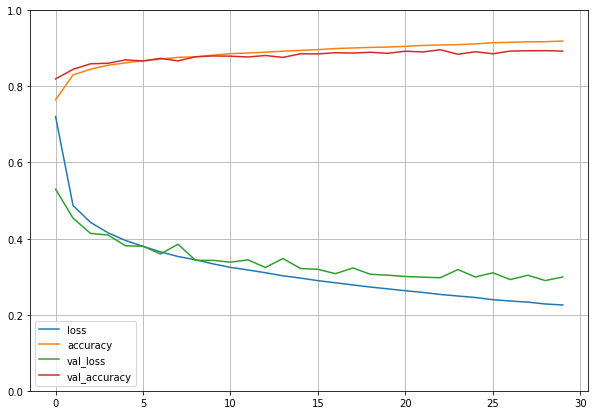

In [110]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.ylim([0,1]);

You can see that both the training and validation accuracy steadily increase during
training, while the training and validation loss decrease. Moreover, the validation curves are quite close to the training curves this shows that the model is not overfitting. Since the validation loss is still going down, it means that the model has yet not converged abd you can keep training the model for more epochs. **It’s as simple as calling the `fit()` method again, since Keras just continues training where it left off.**

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 4ms/step - loss: 59.5654 - accuracy: 0.8561


[59.565399169921875, 0.8561000227928162]

Hmm! 85.6% accuracy. Not that good from the simple `LogisticRegressor`. Also note that the accuracy on validation set was 89.3%. Generally, the score on test set is lower than that on validation test, for obvious reasons!

We can also try tuning the hyperparameters. But let's assume that we are satisfied with the model. Time to evaluate our model. On second thoughts, let's train for 10 more epochs.

In [111]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 0.2215 - accuracy: 0.9222 - val_loss: 0.2834 - val_accuracy: 0.8958
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2182 - accuracy: 0.9215 - val_loss: 0.3307 - val_accuracy: 0.8794
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2145 - accuracy: 0.9228 - val_loss: 0.2890 - val_accuracy: 0.8940
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2103 - accuracy: 0.9249 - val_loss: 0.2917 - val_accuracy: 0.8932
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2073 - accuracy: 0.9258 - val_loss: 0.2888 - val_accuracy: 0.8944
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2035 - accuracy: 0.9264 - val_loss: 0.2992 - val_accuracy: 0.8920
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2005 - accuracy: 0.9284 - val_loss: 0.2933 - val_accuracy

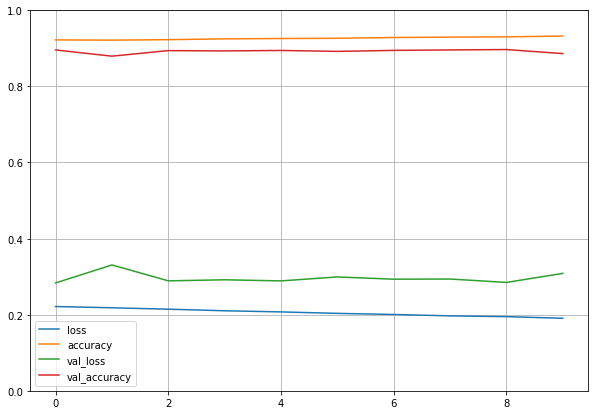

In [113]:
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.ylim([0,1]);

Since the val_accuarcy is still increasing, we can keep on training. But we'll stop here for now!

In [114]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 3ms/step - loss: 60.9790 - accuracy: 0.8605


[60.979007720947266, 0.8604999780654907]

We did made some progress! ):

#### Using the Model to Make Predictions

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [68]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Great! It classifies all the first three images correctly.

#### Building a Regression MLP Using the Sequential API

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [23]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

As before, let's first use a linear model to train on this data.

In [11]:
from sklearn.linear_model import LinearRegression
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_lin = scaler.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_full_scaled, y_train_full)

LinearRegression()

In [12]:
lin_reg.score(X_test_lin, y_test)

0.5751409940918981

In [13]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_test_lin)
(mean_squared_error(y_pred, y_test))**0.5

0.7613221016303993

Okay, the root mean square error is 0.76. Now, lets train a simple MLP.

In [27]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [121]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 28, 30)            870       
_________________________________________________________________
dense_38 (Dense)             (None, 28, 1)             31        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer="sgd", loss="mse", metrics="mae")
history = model.fit(X_train_scaled, y_train, epochs=20,validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 6s 9ms/step - loss: 0.9186 - mae: 0.6640 - val_loss: 2.6933 - val_mae: 0.6257
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 1.7237 - mae: 0.6084 - val_loss: 0.5054 - val_mae: 0.5139
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4748 - mae: 0.4971 - val_loss: 0.4664 - val_mae: 0.4851
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4466 - mae: 0.4803 - val_loss: 0.4519 - val_mae: 0.4768
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4305 - mae: 0.4691 - val_loss: 0.4332 - val_mae: 0.4603
Epoch 6/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4186 - mae: 0.4601 - val_loss: 0.4226 - val_mae: 0.4618
Epoch 7/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4152 - mae: 0.4569 - val_loss: 0.4198 - val_mae: 0.4635
Epoch 8/20
363/363 [==============================] - 3s 7ms/step - loss: 0.

In [93]:
y_pred = model.predict(X_test_scaled)

In [96]:
(mean_squared_error(y_test, y_pred))**0.5

0.5898363690310889

Hurray! The score improved from 0.761 to 0.590.

#### Building Complex Models Using the Functional API

One example of a non-sequential neural network is a Wide & Deep neural network.
It connects all or part of the inputs directly to the output layer, as shown in
the figure. This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path). In
contrast, a regular MLP forces all the data to flow through the full stack of layers, thus
simple patterns in the data may end up being distorted by this sequence of transformations.

<figure>
<figcaption><h4>Wide and Deep Neural Network</h4></figcaption>
<img src = "img/10_11.png">
</figure>

Let's see how it is done:

In [59]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

* First, we need to create an `Input` object. This is needed because we may have
multiple inputs.
* Next, we create a `Dense` layer with 30 neurons and using the ReLU activation
function. **As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API.** We are just telling Keras how it should connect the layers together.
* We then create a second hidden layer, and again we use it as a function. Note
however that we pass it the output of the first hidden layer.
* Next, we create a` concatenate()` layer, and once again we immediately use it like
a function, to concatenate the input and the output of the second hidden layer. We can also use `keras.layers.Concatenate()` to create an instance of the `Concatenate()` object and pass the input and hiddent layers afterward.
* Then we create the output layer, with a single neuron and no activation function,
and we call it like a function, passing it the result of the concatenation.
* Lastly, we create a Keras Model, specifying which inputs and outputs to use.<br>
Now that the model is created, you must compile the model, train it, evaluate it and use it to make
predictions.

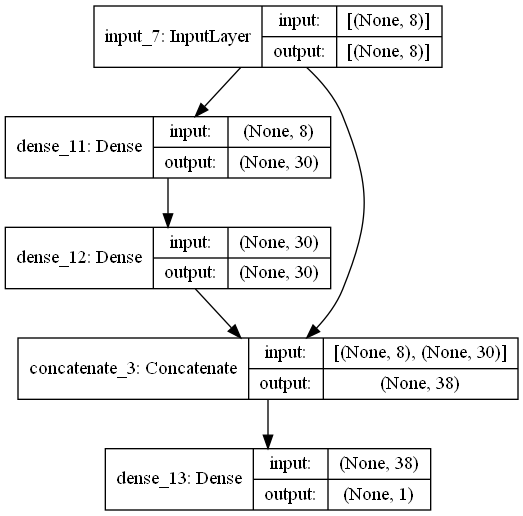

In [60]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

If you want to send a subset of the features through the wide path, and a
different subset (possibly overlapping) through the deep path you can use multiple inputs, like:

In [56]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

Note that we specified `inputs=[input_A, input_B]`
when creating the model. Now we can compile the model as usual, but when we call
the `fit()` method, instead of passing a single input `matrix X_train`, we must pass a
pair of matrices `(X_train_A, X_train_B)`: one per input. The same is true for
`X_valid`, and also for `X_test` and `X_new` when you call `evaluate()` or `predict()`

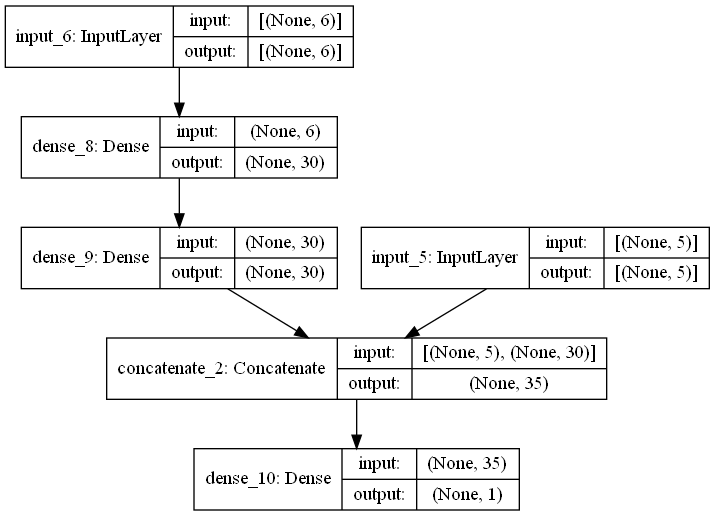

In [58]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [35]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [36]:
model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9103 - val_loss: 2.6896
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6953 - val_loss: 0.5209
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5196 - val_loss: 0.4901
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4677 - val_loss: 0.4439
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4447 - val_loss: 0.4484
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4384 - val_loss: 0.4337
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4428 - val_loss: 0.4140
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4247 - val_loss: 0.4102
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4239 - val_loss: 0.4034
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4102 - val_loss: 0.4059

In [37]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 5.6201


In [38]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict((X_test_A, X_test_B))
mean_squared_error(y_test, y_pred)

5.620115790512163

In [53]:
y_pred = model.predict((X_train_A, X_train_B))
mean_squared_error(y_train, y_pred)

0.3509396734169281

It seems the model was overfitting hence this horrible mse on test set!

<figure>
<figcaption><h4>Handling Multiple Inputs</h4></figcaption>
<img src = "img/10_12.png">
</figure>

There can be some cases when you may want to have multiple outputs. For example a regularization technique. You may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the
network learns something useful on its own, without relying on the rest of the
network. Adding extra outputs is quite easy: just connect them to the appropriate layers and
add them to your model’s list of outputs.

In [102]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

This is the same model as above but uses two outputs. By default, Keras will compute all these losses and
simply add them up to get the final loss used for training. However, we care much
more about the main output than about the auxiliary output, so we want to give the main output’s loss a much greater weight. 

In [103]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Now when we train the model, we need to provide some labels for each output. In
this example, the main output and the auxiliary output should try to predict the same
thing, so they should use the same labels. So instead of passing `y_train`, we just need
to pass `(y_train, y_train)`.

In [91]:
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 13s 17ms/step - loss: 1.0193 - dense_36_loss: 0.9048 - dense_37_loss: 2.0492 - val_loss: 0.9755 - val_dense_36_loss: 0.9508 - val_dense_37_loss: 1.1977
Epoch 2/20
363/363 [==============================] - 5s 13ms/step - loss: 0.5941 - dense_36_loss: 0.5461 - dense_37_loss: 1.0262 - val_loss: 0.5031 - val_dense_36_loss: 0.4518 - val_dense_37_loss: 0.9646
Epoch 3/20
363/363 [==============================] - 5s 13ms/step - loss: 0.4998 - dense_36_loss: 0.4595 - dense_37_loss: 0.8628 - val_loss: 0.4675 - val_dense_36_loss: 0.4283 - val_dense_37_loss: 0.8200
Epoch 4/20
363/363 [==============================] - 5s 13ms/step - loss: 0.4700 - dense_36_loss: 0.4378 - dense_37_loss: 0.7605 - val_loss: 0.4443 - val_dense_36_loss: 0.4128 - val_dense_37_loss: 0.7275
Epoch 5/20
363/363 [==============================] - 4s 12ms/step - loss: 0.4465 - dense_36_loss: 0.4187 - dense_37_loss: 0.6967 - val_loss: 0.4319 - val_dense_36_loss: 0.4052 - 

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 4s 2ms/step - loss: 6.6397 - dense_24_loss: 6.7451 - dense_25_loss: 5.6909


In [68]:
total_loss

6.639705181121826

Similarly, the `predict()` method will return predictions for each output:

In [74]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [75]:
y_pred_main.shape, y_pred_aux.shape

((3, 1), (3, 1))

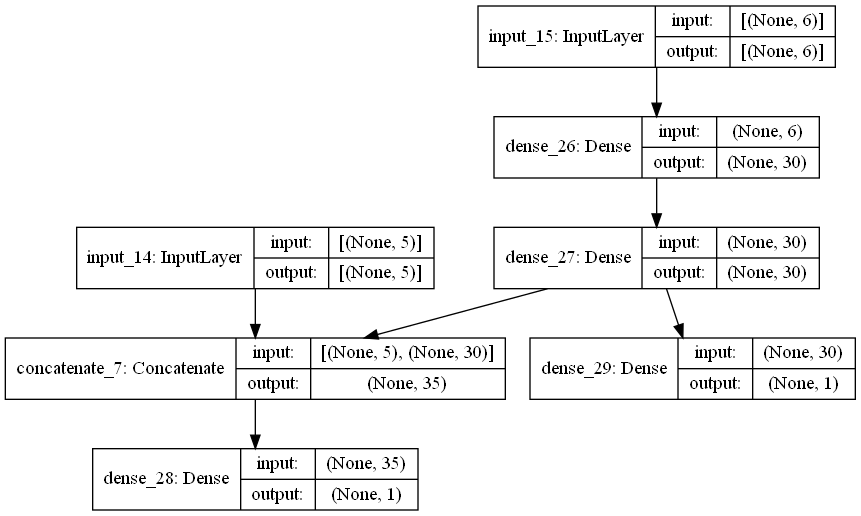

In [84]:
plot_model(model, show_shapes=True)

#### Building Dynamic Models Using the Subclassing API

Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then
can you start feeding the model some data for training or inference. This has many
advantages: the model can easily be saved, cloned, shared, its structure can be displayed and analyzed, the framework can infer shapes and check types, so errors can
be caught early. However, some models involve loops, varying shapes, conditional branching,
and other dynamic behaviors. For such cases, you can use the Subclassing API.

Simply subclass the `Model` class, create the layers you need in the constructor, and use
them to perform the computations you want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent
model to the one we just built with the Functional API. You can then compile it, evaluate it and use it to make predictions, exactly like we just did.

In [86]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

This example looks very much like the Functional API, except we do not need to create the inputs, we just use the input argument to the `call()` method, and we separate
the creation of the layers in the constructor from their usage in the `call()` method.
However, the big difference is that you can do pretty much anything you want in the
`call()` method: for loops, if statements, low-level TensorFlow operations etc.
<br>
However, this extra flexibility comes at a cost: your model’s architecture is hidden
within the `call()` method, so Keras cannot easily inspect it, it cannot save or clone it,
and when you call the `summary()` method, you only get a list of layers, without any
information on how they are connected to each other. Moreover, Keras cannot check
types and shapes ahead of time, and it is easier to make mistakes. **So unless you really
need that extra flexibility, you should probably stick to the Sequential API or the
Functional API.**

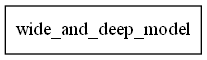

In [88]:
plot_model(model, show_shapes=True)

> Keras models can be used just like regular layers, so you can easily
compose them to build complex architectures.

#### Saving and Restoring a Model

Saving a trained Keras model is very simple:

In [92]:
model.save("my_keras_model.h5")

Keras will save both the model’s architecture (including every layer’s hyperparameters) and the value of all the model parameters for every layer (e.g., connection
weights and biases), using the HDF5 format. It also saves the optimizer (including its
hyperparameters and any state it may have).

Loading
the model is just as easy:

In [93]:
model = keras.models.load_model("my_keras_model.h5")

>This will work when using the Sequential API or the Functional
API, but unfortunately not when using Model subclassing. However, you can use `save_weights()` and `load_weights()` to at least
save and restore the model parameters (but you will need to save
and restore everything else yourself).

#### Using Callbacks

The `fit()` method accepts a callbacks argument that lets you specify a list of objects
that Keras will call during training at the start and end of training, at the start and end
of each epoch and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during
training, by default at the end of each epoch. This is really helpful when training a model takes hours. In this case you can save checkpoints at regular intervals during training

In [95]:
#Building the model
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

#Compiling the model
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

#Using callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 12s 17ms/step - loss: 1.3580 - dense_44_loss: 1.2603 - dense_45_loss: 2.2370 - val_loss: 1.2418 - val_dense_44_loss: 1.1494 - val_dense_45_loss: 2.0736
Epoch 2/20
363/363 [==============================] - 4s 12ms/step - loss: 0.6222 - dense_44_loss: 0.5542 - dense_45_loss: 1.2342 - val_loss: 0.6018 - val_dense_44_loss: 0.5361 - val_dense_45_loss: 1.1935
Epoch 3/20
363/363 [==============================] - 4s 11ms/step - loss: 0.5318 - dense_44_loss: 0.4803 - dense_45_loss: 0.9956 - val_loss: 0.5061 - val_dense_44_loss: 0.4525 - val_dense_45_loss: 0.9879
Epoch 4/20
363/363 [==============================] - 4s 12ms/step - loss: 0.4861 - dense_44_loss: 0.4448 - dense_45_loss: 0.8578 - val_loss: 0.4748 - val_dense_44_loss: 0.4341 - val_dense_45_loss: 0.8412
Epoch 5/20
363/363 [==============================] - 4s 12ms/step - loss: 0.4641 - dense_44_loss: 0.4310 - dense_45_loss: 0.7621 - val_loss: 0.4449 - val_dense_44_loss: 0.4114 - 

Moreover, if you use a validation set during training, you can set
`save_best_only=True` when creating the ModelCheckpoint. In this case, it will only
save your model when its performance on the validation set is the best so far. This
way, you do not need to worry about training for too long and overfitting the training
set: simply restore the last model saved after training, and this will be the best model
on the validation set. This is a simpler way of early stopping.

Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for
a number of epochs (defined by the patience argument), and it will optionally roll
back to the best model.

```
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
```

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. Moreover, there is no need to restore the best
model saved in this case since the `EarlyStopping` callback will keep track of the best
weights and restore them for us at the end of training

If you need extra control, you can easily write your own custom callbacks. For example, the following custom callback will display the ratio between the validation loss
and the training loss during training.

In [96]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

You can implement `on_train_begin()`, `on_train_end()`,
`on_epoch_begin()`, `on_epoch_begin()`, `on_batch_end()` and `on_batch_end()`.
Moreover, callbacks can also be used during evaluation and predictions, should you
ever need them (e.g., for debugging). In this case, you should implement
`on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, or
`on_test_batch_end()` (called by `evaluate()`), or `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by
`predict()`).

#### Visualization Using TensorBoard

To use `TensorBoard`, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files. Each binary data record is called a
*summary*. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize
live data (with a short delay), such as the learning curves during training. In general,
you want to point the `TensorBoard` server to a root log directory, and configure your
program so that it writes to a different subdirectory every time it runs. This way, the
same `TensorBoard` server instance will allow you to visualize and compare data from
multiple runs of your program, without getting everything mixed up.

In [98]:
import os
import time
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

Keras already provides a nice `TensorBoard` callback:

In [100]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [109]:
import tensorflow as tf
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [110]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 11s 20ms/step - loss: 0.3535 - dense_48_loss: 0.3386 - dense_49_loss: 0.4878 - val_loss: 0.3374 - val_dense_48_loss: 0.3221 - val_dense_49_loss: 0.4749
Epoch 2/20
363/363 [==============================] - 5s 13ms/step - loss: 0.3512 - dense_48_loss: 0.3366 - dense_49_loss: 0.4821 - val_loss: 0.3504 - val_dense_48_loss: 0.3367 - val_dense_49_loss: 0.4734
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.3499 - dense_48_loss: 0.3358 - dense_49_loss: 0.4770 - val_loss: 0.3437 - val_dense_48_loss: 0.3298 - val_dense_49_loss: 0.4689
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3502 - dense_48_loss: 0.3368 - dense_49_loss: 0.4714 - val_loss: 0.3542 - val_dense_48_loss: 0.3404 - val_dense_49_loss: 0.4781
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3457 - dense_48_loss: 0.3324 - dense_49_loss: 0.4657 - val_loss: 0.3440 - val_dense_48_loss: 0.3302 - val

Next you need to start the TensorBoard server. Using `tensorboard --logdir=./logs/fit --port=6006` on command prompt does the work! Or use the follwing magic command.

In [111]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3880), started 0:09:27 ago. (Use '!kill 3880' to kill it.)

### Fine-Tuning Neural Network Hyperparameters

A neural network have many
hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more.